# NLP With Hotel Review Part 1

### By: Roman Kovalchuk

## Table of Contents:
* [Introduction](#Introduction)
* [Data dictionary](#Data-dictionary)
* [Exploratory Data Analysis](#eda)
* [Checking the shape of the dataset](#shape)
* [Converting reviews to integer values](#reviews)
* [Reviewer Score distribution](#reviewer)
* [Checking datatypes](#datatypes)
* [Exploring Hotel_Address](#address)
* [Exploring Review_Date](#rdate)
* [Exploring Hotel_Name](#hotelname)
* [Exploring Reviewer_Nationality](#rnationality)
* [Exploring Tags](#tags)
* [Exploring days_since_review](#dayssince)
* [Data Wrangling](#wrangling)
* [Separating data](#seperating)
* [Dealing with Null values](#nulls)
* [Converting Reviewer_Score into a binary column](#conreview)
* [Converting Hotel_Address to numeric column](#conaddress)
* [Converting Review_Date to numeric column](#conrdate)
* [Converting Hotel_Name to numeric column](#conhotel)
* [Converting Reviewer_Nationality to numeric column](#connationality)
* [Converting days_since_review to numeric column](#condays)
* [Splitting the data into train and test sets](#splitting)
* [Vectorizing Positive_Review and Negative_Review columns](#vectorizing)
* [Combining the three matrixes](#combining)
* [Conclusion](#conclusion)


## Introduction<a class="anchor" id="Introduction"></a>

In this project we will be looking at a dataset containing hotel reviews. Each row corresponds to a review of a hotel, which includes a rating as well as negative and positive comments of the review. Our objective is to clean and explore the data, prepare it for modelling by feature engineering the non-numeric columns, and running a count vectorizer on the positive and negative review columns. The data dictionary can be seen below.

## Data Dictionary<a class="anchor" id="Data-dictionary"></a>

Let's take a look at the data that we will be working with

- `Hotel_Address` - Address of the hotel
- `Additional_Number_of_Scoring` - Additional number of scoring
- `Review_Date` - Date of the review
- `Average_Score` - Average score of the hotel
- `Hotel_Name` - Name of the hotel
- `Reviewer_Nationality` - Where the reviewer is from
- `Negative_Review` - The negative review comments
- `Review_Total_Negative_Word_Counts` - The word count of the negative review
- `Total_Number_of_Reviews` - Total number of reviews
- `Positive_Review`	- The positive review comments
- `Review_Total_Positive_Word_Counts` - The word count of the positive review
- `Total_Number_of_Reviews_Reviewer_Has_Given` - Total number of reviews the reviewer has given
- `Tags` - Tags of the review
- `days_since_review` - Days since the review
- `lat` - Latitude of the hotel
- `lng` - Longitude of the hotel

First let's import the libraries that we will be using:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


Next, let's import the dataset:

In [2]:
hotels = pd.read_csv('data/Hotel_Reviews.csv')

In [3]:
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

## Exploratory Data Analysis<a class="anchor" id="eda"></a>

### Checking the shape of the dataset<a class="anchor" id="shape"></a>

Let's check the shape of the dataset:

In [5]:
#checking the shape of the dataset

hotels.shape

print(f"There are {hotels.shape[0]} rows and {hotels.shape[1]} columns")

There are 515738 rows and 17 columns


### Converting the reviews to integer values<a class="anchor" id="reviews"></a>

Since the reviews are given in decimal values, we can convert them to integers from 1-10 to gain a clearer understanding of the distribution.

In [6]:
# converting Reviewer_Score
hotels['Reviewer_Score'] = hotels['Reviewer_Score'].apply(lambda x: np.ceil(x) if ((np.ceil(x) - x)) <= 0.5 else np.floor(x)).astype(int)

We will set up a lambda function to utilize the ceiling and floor parameters to avoid the banker's round,implemented with the `round()` function, which rounds .5 to the nearest even number, meaning that 2.5 would be rounded to 2 instead of the desired 3. Instead we employ a lambda function to round the `Reviewer_Score` down if the number is less than 0.5 and up if it is 0.5 or higher giving us the desired result.

Now let's check the data again to see if everything converted as planned:

In [7]:
hotels["Reviewer_Score"]

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    3
515736    9
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64

### `Reviewer_Score` distribution<a class="anchor" id="reviewer"></a>

Since the reviews are based on the satisfaction of the customer, we can expect it to be higher and skewed to the left if they enjoyed their experience or lower and skewed to the right if they were not satisfied with their respective hotel. In this example, we may expect a slight left skew, as hotels that do not provide good service usually go out of business in the competitive hotel marketplace. Let's see what the distribution is like:

In [8]:
#checking value counts of distribution
hotels['Reviewer_Score'].value_counts() / len(hotels) * 100

10    36.402980
8     21.260214
9     20.597668
7      8.615421
6      5.323439
5      4.713634
4      1.805956
3      1.280689
Name: Reviewer_Score, dtype: float64

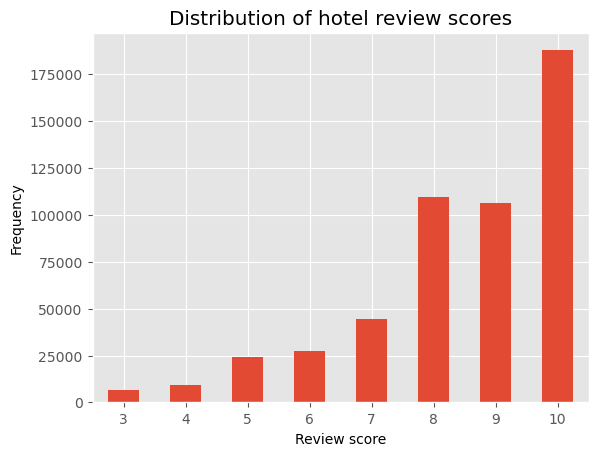

In [9]:
#changing the style of the plot
plt.style.use('ggplot')

#plotting the value counts of hotel reviewes by score
hotels["Reviewer_Score"].value_counts().sort_index().plot.bar()
plt.xlabel('Review score')
plt.ylabel('Frequency')
plt.title('Distribution of hotel review scores')
plt.tick_params(axis='x', labelrotation=1)
plt.show()

The distribution is significantly left skewed with 76% of reviews in the 8-10 range. It's interesting to note that 36% of reviewers left a review of 10. Most of the reviews are positive, which means that we may assume there will be fewer Negative Review tokens. This raises an issue with the fact that the model will be biased towards predicting positive reviews, as they are significantly over represented in the distribution. To avoid this issue, we can balance the data by under sampling the majority or oversampling the minority class, but this may present it's own issues down the line.

Oversampling the minority class can lead to over fitting, leading to a biased model which does not translate well to new data while under sampling the majority can run the risk of losing important information, creating a biased model in the other direction.


### Checking datatypes<a class="anchor" id="datatypes"></a>

In [10]:
hotels.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [11]:
#selecting object datatype
hotels_object = hotels.select_dtypes("object").columns
print(hotels_object)

Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'],
      dtype='object')


In [12]:
#selecting numeric datatypes
hotels_number = hotels.select_dtypes("number").columns
print(hotels_number)

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng'],
      dtype='object')


The numeric columns are:                                 
- `Additional_Number_of_Scoring`                         
- `Average_Score`                                       
- `Review_Total_Negative_Word_Counts`
- `Total_Number_of_Reviews`
- `Review_Total_Positive_Word_Counts`
- `Total_Number_of_Reviews_Reviewer_Has_Given`
- `Reviewer_Score`
- `lat`
- `lng`

The non-numeric columns are:
- `Hotel_Address`
- `Review_Date`
- `Hotel_Name`
- `Reviewer_Nationality`
- `Negative_Review`
- `Positive_Review`
- `Tags`
- `days_since_review`

Let's further explore our non-numeric variables and see if we can convert them to numeric variables before we start modelling.

### Exploring `Hotel_Address`<a class="anchor" id="address"></a>

First let's see the unique values in the `Hotel_Address` category to see if we can find some useful information to extract and convert:

In [13]:
# finding unique values in the Hotel_Address column
hotel_counts = hotels['Hotel_Address'].value_counts()

# finding unique values in the Hotel_Address column
unique = hotels['Hotel_Address'].nunique()

print(hotel_counts.head(15))
print(f'There are {unique} unique values in the Hotel_Address column.')

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom              2958
Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom                  2768
225 Edgware Road Westminster Borough London W2 1JU United Kingdom                 2628
4 18 Harrington Gardens Kensington and Chelsea London SW7 4LH United Kingdom      2565
1 Waterview Drive Greenwich London SE10 0TW United Kingdom                        2551
27 Devonshire Terrace Westminster Borough London W2 3DP United Kingdom            2288
Lakeside Way Brent London HA9 0BU United Ki

It seems that each address contains a city and country name. It seems like a lot of hotels are located in United Kingdom so we can create dummy variables with the most popular hotels by city and country. The location itself is reflected in the `lat` and `lng` data so we no longer need it. Next let's take a look at `Review_Date`.

### Exploring `Review_Date`<a class="anchor" id="rdate"></a>

In [14]:
# finding unique values in the Review_Date column
review_counts = hotels['Review_Date'].value_counts()

# finding unique values in the Review_Date column
unique = hotels['Review_Date'].nunique()

print(review_counts.head(15))
print(f'There are {unique} unique values in the Review_Date column.')

8/2/2017     2585
9/15/2016    2308
4/5/2017     2284
8/30/2016    1963
2/16/2016    1940
7/5/2016     1904
5/31/2016    1860
12/5/2016    1803
7/12/2016    1801
8/2/2016     1783
6/21/2016    1750
5/3/2016     1732
4/26/2016    1729
3/29/2016    1627
8/9/2016     1583
Name: Review_Date, dtype: int64
There are 731 unique values in the Review_Date column.


It seems that there are 731 unique values in the `Review_Date` column, with the majority of reviews coming in the fall and summer months when people are most likely to travel and leave reviews. We can convert these columns to `datetimeformat` and then extract the Year, Month, and Day. Next, let's take a look at the `Hotel_Name` column.

### Exploring `Hotel_Name`<a class="anchor" id="hotelname"></a>

In [15]:
# finding the unique values in the Hotel_Name column
name_values = hotels['Hotel_Name'].value_counts()

# finding the number of unique values in the Hotel_Name column
unique = hotels['Hotel_Name'].nunique()

print(name_values.head(15))
print(f'There are {unique} unique values in the Hotel_Name column.')


Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
Name: Hotel_Name, dtype: int64
There are 1492 unique values in the Hotel_Name column.


In [16]:
#finding percentage of values
percentage = name_values / hotels.shape[0]*100

print(percentage)

Britannia International Hotel Canary Wharf           0.928572
Strand Palace Hotel                                  0.825225
Park Plaza Westminster Bridge London                 0.808356
Copthorne Tara Hotel London Kensington               0.693763
DoubleTree by Hilton Hotel London Tower of London    0.622797
                                                       ...   
Ibis Styles Milano Palmanova                         0.002327
Hotel Eitlj rg                                       0.002327
Hotel Wagner                                         0.001939
Mercure Paris Porte d Orleans                        0.001939
Hotel Gallitzinberg                                  0.001551
Name: Hotel_Name, Length: 1492, dtype: float64


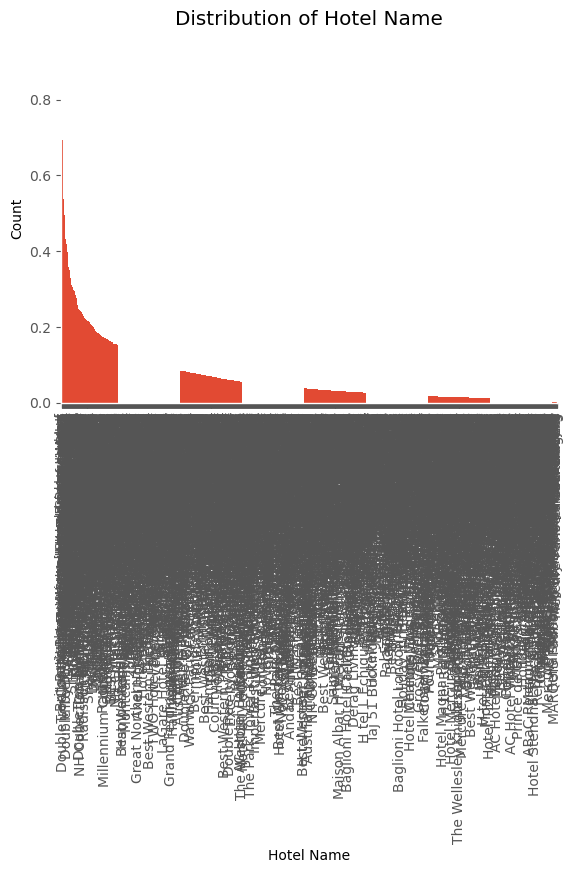

In [17]:
# plotting the distribution of Hotel_Name column

percentage.plot(kind='bar')
plt.title('Distribution of Hotel Name')
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.show()

On the graph above, we can see that some hotels are represented more than others, so we can create a popularity index to categorize the hotels in terms of high, medium or low popularity by number of reviews. Now let's look at the `Reviwer_Nationality` column.

### Exploring `Reviewer_Nationality`:<a class="anchor" id="rnationality"></a>

In [18]:
# calculating unique values in the Reviewer_Nationality column
reviwer_counts = hotels['Reviewer_Nationality'].value_counts()

# finding the number of unique values in the Reviewer_Nationality column
unique = hotels['Reviewer_Nationality'].nunique()

print(reviwer_counts.head(15))
print(f'There are {unique} unique values in the Reviewer_Nationality column.')

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
Name: Reviewer_Nationality, dtype: int64
There are 227 unique values in the Reviewer_Nationality column.


In [19]:
#checking the percentage of Reviewer_Nationality
hotels["Reviewer_Nationality"].value_counts() / len(hotels["Reviewer_Nationality"])

 United Kingdom               0.475524
 United States of America     0.068711
 Australia                    0.042048
 Ireland                      0.028749
 United Arab Emirates         0.019845
                                ...   
 Cape Verde                   0.000002
 Northern Mariana Islands     0.000002
 Tuvalu                       0.000002
 Guinea                       0.000002
 Palau                        0.000002
Name: Reviewer_Nationality, Length: 227, dtype: float64

We see that just fewer than 48% of reviewers are from United Kingdom and the next highest come from USA with less than 7%. We can take the top 4 `Reviewer_Nationality`'s and group the rest under other. This would give us 5 dummy columns from this category. Now, let's look at the `Tags` in the dataset.

### Exploring `Tags`<a class="anchor" id="tags"></a>

In [20]:
# calculating the unique values in the Reviewer_Nationality column
tag_counts = hotels['Tags'].value_counts()

# finding the number of unique values in the Reviewer_Nationality column
unique = hotels['Tags'].nunique()

print(tag_counts.head(15))
print(f'There are {unique} unique values in the Reviewer_Nationality column.')

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']              5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']     4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']     4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']       3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']             3291
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']    3102
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']    2947
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']                                                  2906
[' Leisure trip ', ' Cou

The first tag in the array seems to represent the type of trip that was taken. In this case, we can see "Leisure Trip" and "Business Trip", followed by whether the trip was taken by a couple or solo individual, type of room and how many nights they stayed. We can see that some columns contain 5 tags while others contain 4 or 3 tags. We can create a seperate column to show how many tags each review contains as the content of the `Tags` may overlap with the review categories.

### Exploring `days_since_review`<a class="anchor" id="dayssince"></a>

In [21]:
# finding the unique values in the days_since_review column
days_counts = hotels['days_since_review'].value_counts()

# calculating the number of unique values in the days_since_review column
unique = hotels['days_since_review'].nunique()

print(days_counts)
print(f'There are {unique} unique values in the days_since_review column.')

1 days     2585
322 day    2308
120 day    2284
338 day    1963
534 day    1940
           ... 
327 day     199
615 day     194
122 day     192
124 day     173
123 day     143
Name: days_since_review, Length: 731, dtype: int64
There are 731 unique values in the days_since_review column.


It looks like the `days_since_review` column contains the number of days that elapsed since the person last left a review. We can convert this to a numeric by stripping the day and days text and leaving the numeric value. We will convert these columns to numeric in the next section.

# Data Wrangling<a class="anchor" id="wrangling"></a>

### Separating data<a class="anchor" id="seperating"></a>

For the next part, we will sample 10% of the dataset using `train_test_split`. Since we will be modelling on the data, we need to make sure that the sample distribution reflects the original We will assign a `random_state` to ensure that this split is replicable:

In [22]:
#splitting 10% of data
X_train, X_test = train_test_split(hotels, test_size=0.9, random_state=12)

#putting into new DataFrame
X_train = pd.DataFrame(X_train, columns = hotels.columns)

#checking the shape
X_train.shape

(51573, 17)

In [23]:
#saving a copy of original dataset to new DataFrame
hotels_sample = X_train.copy()

In [24]:
#checking info
hotels_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51573 entries, 353950 to 472907
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51573 non-null  object 
 1   Additional_Number_of_Scoring                51573 non-null  int64  
 2   Review_Date                                 51573 non-null  object 
 3   Average_Score                               51573 non-null  float64
 4   Hotel_Name                                  51573 non-null  object 
 5   Reviewer_Nationality                        51573 non-null  object 
 6   Negative_Review                             51573 non-null  object 
 7   Review_Total_Negative_Word_Counts           51573 non-null  int64  
 8   Total_Number_of_Reviews                     51573 non-null  int64  
 9   Positive_Review                             51573 non-null  object 
 10  Revi

Lets check to see if we got the right amount of data by dividing it by the length of the original dataset:

In [25]:
#checking the percentage of the new dataset
len(hotels_sample) / len(hotels) * 100

9.999844882479088

We've successfully sampled 10% of the initial dataset and are ready to continue wrangling the data.

### Dealing with Null values<a class="anchor" id="nulls"></a>

Let's see if we have any null values in our hotels sample:

In [26]:
#checking for nulls
nulls = hotels_sample.isnull()
nulls.sum()

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Tags                                            0
days_since_review                               0
lat                                           327
lng                                           327
dtype: int64

We have 327 nulls and they are in the `lat` and `lng` column. These columns represent the coordinates of the hotels. We can identify the rows that have the missing values and then fill them in using an online Lat/Lon finder like [latlong](http://www.latlong.net)

In [27]:
#Displaying all rows that contain null values
#pd.options.display.max_rows = None

hotels_sample[hotels_sample.isnull().any(axis=1)]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
352110,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,39,5/9/2017,8.4,Cordial Theaterhotel Wien,Bulgaria,No Negative,0,422,Very good hotel in the top center of Vienna o...,53,13,10,"[' Leisure trip ', ' Family with young childre...",86 days,NaN,NaN
351494,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,333,3/6/2017,8.3,Fleming s Selection Hotel Wien City,Israel,The breakfast was ok but the pastries could v...,29,3672,The staff was VERY curtious patient and helpf...,40,1,10,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",150 day,NaN,NaN
352156,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,39,3/28/2016,8.4,Cordial Theaterhotel Wien,Singapore,The reception gave us too many wrong informat...,13,422,The room was big enough and feel comfortable,9,31,8,"[' Leisure trip ', ' Group ', ' Junior Suite '...",493 day,NaN,NaN
465627,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,211,11/4/2016,8.6,Hotel City Central,Australia,Our fridge was a bit smelly,7,2923,The staff were very friendly and helpful Grea...,10,3,9,"[' Leisure trip ', ' Couple ', ' Standard Doub...",272 day,NaN,NaN
500514,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,12/14/2015,7.8,Hotel Atlanta,Slovakia,Bit too soft mettress,5,2724,No Positive,0,2,8,"[' Business trip ', ' Solo traveler ', ' Singl...",598 day,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440868,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,86,1/11/2016,8.3,Austria Trend Hotel Schloss Wilhelminenberg Wien,Italy,Not at all what you think you are getting We ...,276,1558,GREAT view from the hotel balcony beautiful h...,17,23,5,"[' Leisure trip ', ' Family with older childre...",570 day,NaN,NaN
351934,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,333,6/26/2016,8.3,Fleming s Selection Hotel Wien City,Hungary,No Negative,0,3672,Clean hotel with exelent service location is ...,18,2,9,"[' Leisure trip ', ' Couple ', ' Superior Doub...",403 day,NaN,NaN
365516,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,101,1/26/2016,8.5,Hotel Daniel Vienna,Vietnam,The bakery was very average The breakfast was...,13,1405,Rooms were clean and stylish The location is ...,18,1,8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",555 day,NaN,NaN
338970,Hasenauerstra e 12 19 D bling 1190 Vienna Austria,37,3/13/2016,8.6,Hotel Park Villa,Slovenia,Wifi doesn t work all the time in room,11,564,Nice place Breakfast was good,7,40,10,"[' Business trip ', ' Travelers with friends '...",508 day,NaN,NaN


In [28]:
#Creating a for loop to match the longitude and latitude values to the address
for index, row in hotels_sample.iterrows():
#iterating over addresses with missing values and filling them in with appropriate values
    if row['Hotel_Name'] == "Cordial Theaterhotel Wien":
        hotels_sample.loc[index, 'lat'] = 48.202184
        hotels_sample.loc[index, "lng"] = 16.368654
    elif row['Hotel_Name'] == "Fleming s Selection Hotel Wien City":
        hotels_sample.loc[index, 'lat'] = 48.207372
        hotels_sample.loc[index, "lng"] = 16.357920
    elif row['Hotel_Name'] == "Hotel City Central":
        hotels_sample.loc[index, 'lat'] = 48.211032
        hotels_sample.loc[index, "lng"] = 16.373685
    elif row['Hotel_Name'] == "Hotel Atlanta":
        hotels_sample.loc[index, 'lat'] = 48.210479
        hotels_sample.loc[index, "lng"] = 16.363089
    elif row['Hotel_Name'] == "NH Collection Barcelona Podium":
        hotels_sample.loc[index, 'lat'] = 41.392039
        hotels_sample.loc[index, "lng"] = 2.177113
    elif row['Hotel_Name'] == "Maison Albar Hotel Paris Op ra Diamond":
        hotels_sample.loc[index, 'lat'] = 48.872235
        hotels_sample.loc[index, "lng"] = 2.327540
    elif row['Hotel_Name'] == "Hotel Daniel Vienna":
        hotels_sample.loc[index, 'lat'] = 48.203160
        hotels_sample.loc[index, "lng"] = 16.377290
    elif row['Hotel_Name'] == "Hotel Daniel Vienna":
        hotels_sample.loc[index, 'lat'] = 48.203160
        hotels_sample.loc[index, "lng"] = 16.377290
    elif row['Hotel_Name'] == "Mercure Paris Gare Montparnasse":
        hotels_sample.loc[index, 'lat'] = 48.837403
        hotels_sample.loc[index, "lng"] = 2.321436
    elif row['Hotel_Name'] == "Hotel Pension Baron am Schottentor":
        hotels_sample.loc[index, 'lat'] = 48.216022
        hotels_sample.loc[index, "lng"] = 16.356535
    elif row['Hotel_Name'] == "Holiday Inn Paris Montmartre":
        hotels_sample.loc[index, 'lat'] = 48.887857
        hotels_sample.loc[index, "lng"] = 2.330924
    elif row['Hotel_Name'] == "Renaissance Barcelona Hotel":
        hotels_sample.loc[index, 'lat'] = 41.392015
        hotels_sample.loc[index, "lng"] = 2.161791     
    elif row['Hotel_Name'] == "City Hotel Deutschmeister":
        hotels_sample.loc[index, 'lat'] = 48.219071
        hotels_sample.loc[index, "lng"] = 16.377491 
    elif row['Hotel_Name'] == "Derag Livinghotel Kaiser Franz Joseph Vienna":
        hotels_sample.loc[index, 'lat'] = 48.241059
        hotels_sample.loc[index, "lng"] = 16.326502
    elif row['Hotel_Name'] == "Roomz Vienna":
        hotels_sample.loc[index, 'lat'] = 48.185930
        hotels_sample.loc[index, "lng"] = 16.393865
    elif row['Hotel_Name'] == "Austria Trend Hotel Schloss Wilhelminenberg Wien":
        hotels_sample.loc[index, 'lat'] = 48.231800
        hotels_sample.loc[index, "lng"] = 16.283942
    elif row['Hotel_Name'] == "Hotel Advance":
        hotels_sample.loc[index, 'lat'] = 41.384002
        hotels_sample.loc[index, "lng"] =  2.168483
    elif row['Hotel_Name'] == "Hotel Park Villa":
        hotels_sample.loc[index, 'lat'] = 48.244997
        hotels_sample.loc[index, "lng"] = 16.354465

In [29]:
#sanity check for null values
hotels_sample.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

All of our nulls have been sorted but let's check for duplicates.

In [30]:
# checking for duplicate rows
hotels_sample.duplicated().sum()

5

There are 5 duplicates in our dataset but we can assume that these are different reviews of the same hotel. They can contain different reviews for the same hotel so we will keep them in our dataset to make sure we have complete representation of reviews for our analysis. Next, let's move on to feature engineering.

### Converting `Reviewer_Score`  into a binary column<a class="anchor" id="conreview"></a>

Next, we will binarize our reviews by setting up a lambda function, which will categorize reviews that are equal or greater to 9 as 1 and the rest as 0. These will separate the good hotels from the rest.!

In [31]:
# defining lambda function to embed the score
score = lambda x: 1 if x >= 9 else 0

# Apply the function to the Reviewer_Score column and assign the result to a new column
hotels_sample['Reviewer_Score'] = hotels_sample['Reviewer_Score'].apply(score)

In [32]:
# sanity check
hotels_sample["Reviewer_Score"]

353950    0
190346    1
322711    1
506664    1
194252    0
         ..
40177     1
412925    1
255366    0
235163    0
472907    1
Name: Reviewer_Score, Length: 51573, dtype: int64

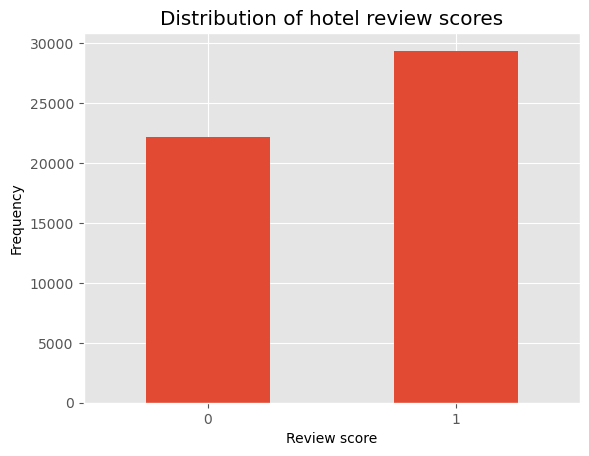

In [33]:
# visualizing reviewer score distribution
hotels_sample["Reviewer_Score"].value_counts().sort_index().plot.bar()
plt.xlabel('Review score')
plt.ylabel('Frequency')
plt.title('Distribution of hotel review scores')
plt.tick_params(axis='x', labelrotation=1)
plt.show()


In [34]:
# calculating percentage
hotels_sample["Reviewer_Score"].value_counts() / len(hotels_sample) * 100

1    57.002695
0    42.997305
Name: Reviewer_Score, dtype: float64

The majority of our reviews fall under 1, which signifies that most hotels have favourable opinions and exceed expectations.

### Converting `Hotel_Address` to numeric<a class="anchor" id="conaddress"></a>

In the previous section we decided that we would group the most popular hotels and then convert them to dummy variables.

In [35]:
# extracting the city and country from the Hotel_Address column
hotels_sample['Hotel_City_Country'] = hotels_sample['Hotel_Address'].str.split(' ').str[-2:]

# checking the results
hotels_sample['Hotel_City_Country']

353950     [Vienna, Austria]
190346     [United, Kingdom]
322711     [United, Kingdom]
506664     [United, Kingdom]
194252     [United, Kingdom]
                 ...        
40177        [Paris, France]
412925    [Barcelona, Spain]
255366     [United, Kingdom]
235163     [United, Kingdom]
472907        [Milan, Italy]
Name: Hotel_City_Country, Length: 51573, dtype: object

We still have some extra spaces and characters that we need to deal with.

In [36]:
# removing the square brackets from the Hotel_City_Country column
hotels_sample['Hotel_City_Country'] = hotels_sample['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')

# checking the results
hotels_sample['Hotel_City_Country'].value_counts()

/var/folders/n4/dk0kn6092fg4rgl4rgty93tr0000gn/T/ipykernel_3010/1258472751.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hotels_sample['Hotel_City_Country'] = hotels_sample['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')


United Kingdom           26121
Paris France              6132
Barcelona Spain           6033
Amsterdam Netherlands     5701
Vienna Austria            3829
Milan Italy               3757
Name: Hotel_City_Country, dtype: int64

The United Kingdom category is missing London, so we can add it below:

In [37]:
# adjusting UK to include London

hotels_sample['Hotel_City_Country'] = hotels_sample['Hotel_City_Country'].str.replace('United Kingdom', 'London United Kingdom')

# checking the results

hotels_sample['Hotel_City_Country'].value_counts()

London United Kingdom    26121
Paris France              6132
Barcelona Spain           6033
Amsterdam Netherlands     5701
Vienna Austria            3829
Milan Italy               3757
Name: Hotel_City_Country, dtype: int64

Let's plot the distribution of these values:

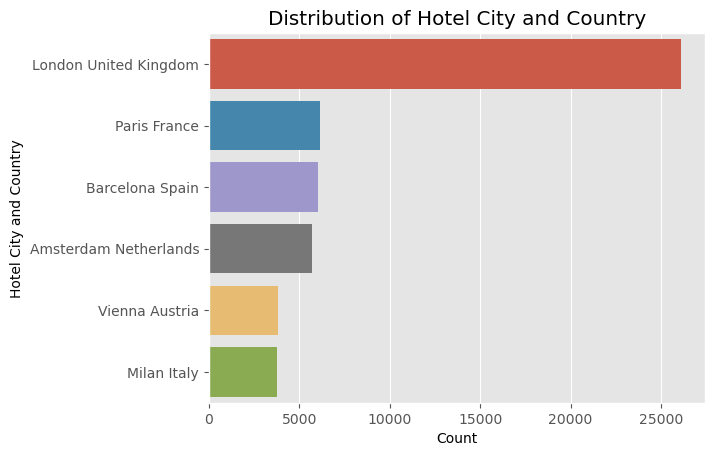

In [38]:
# plotting the distribution of the Hotel_City_Country column

sns.countplot(y=hotels_sample['Hotel_City_Country'], order=hotels_sample['Hotel_City_Country'].value_counts().index)
plt.title('Distribution of Hotel City and Country')
plt.xlabel('Count')
plt.ylabel('Hotel City and Country')
plt.show()


Now, we can use OneHotEncoder to convert these categories into columns. The advantage of OneHotEncoder is that it will ignore new categorical variables that it hasn't seen when fitting a training set to the test set. It is a more efficient way of conversion so we will go through with it here:

Now that we have the categories, we can go ahead and encode them into our DataFrame

In [39]:
#checking the values we will be encoding
hotels_sample['Hotel_City_Country'].unique()

# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
hotel_city_country = pd.DataFrame(hotels_sample['Hotel_City_Country'])
encoded = ohe.fit_transform(hotel_city_country)
encoded

<51573x6 sparse matrix of type '<class 'numpy.float64'>'
	with 51573 stored elements in Compressed Sparse Row format>

In [40]:
# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

[array(['Amsterdam Netherlands', 'Barcelona Spain',
        'London United Kingdom', 'Milan Italy', 'Paris France',
        'Vienna Austria'], dtype=object)]

In [41]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
hotels_sample = hotels_sample.reset_index(drop=True)

# concatenate the two dataframes horizontally
hotels_sample = pd.concat([hotels_sample, encoded_df], axis=1)


In [42]:
#dropping unneeded categories
hotels_sample = hotels_sample.drop(columns=['Hotel_City_Country', "Hotel_Address"])

Let's check to see that everything worked.

In [43]:
hotels_sample

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Tags,days_since_review,lat,lng,"(Amsterdam Netherlands,)","(Barcelona Spain,)","(London United Kingdom,)","(Milan Italy,)","(Paris France,)","(Vienna Austria,)"
0,325,8/1/2017,8.6,Austria Trend Hotel Europa Wien,Oman,Though we had a non smoking room but the smel...,28,3221,Magnificent location and clean hotel The brea...,12,...,"[' Leisure trip ', ' Couple ', ' Comfort Room ...",2 days,48.206210,16.371039,0,0,0,0,0,1
1,166,9/29/2015,8.3,The Justin James Hotel,Finland,No Negative,0,561,Always good wi fi works nice area good parkin...,14,...,"[' Business trip ', ' Solo traveler ', ' Singl...",674 day,51.420266,-0.211268,0,0,1,0,0,0
2,853,4/9/2016,8.4,DoubleTree By Hilton London Excel,United Kingdom,No Negative,0,2726,we couldn t find any faults food was good sta...,19,...,"[' Leisure trip ', ' Couple ', ' Standard Room...",481 day,51.507377,0.038657,0,0,1,0,0,0
3,2623,11/21/2016,8.7,Park Plaza Westminster Bridge London,United Kingdom,No Negative,0,12158,Fabulous customer service,4,...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",255 day,51.500961,-0.116591,0,0,1,0,0,0
4,411,1/28/2016,8.9,The Marylebone Hotel,New Zealand,Size of our bedroom especially the double bed...,19,1738,Location Staff excellent customer service,6,...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",553 day,51.518021,-0.150057,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51568,46,5/3/2016,9.0,Hotel La Lanterne,United Kingdom,No Negative,0,499,Superb location funky decor friendly staff,8,...,"[' Leisure trip ', ' Couple ', ' Privilege Top...",457 day,48.848984,2.348383,0,0,0,0,1,0
51569,332,7/23/2016,8.5,W Barcelona,Ireland,Breakfast is madly expensive and no alternati...,39,2708,Location overlooking private beach Spectacula...,41,...,"[' Leisure trip ', ' Family with older childre...",376 day,41.368437,2.190153,0,1,0,0,0,0
51570,390,6/11/2017,7.8,Best Western Plus Seraphine Hammersmith Hotel,United Kingdom,Room 130 was very compact and had a skylight ...,61,1717,Good location on King Street close to Hammers...,57,...,"[' Business trip ', ' Couple ', ' Standard Dou...",53 days,51.492627,-0.228860,0,0,1,0,0,0
51571,764,2/23/2016,8.2,Club Quarters Hotel Gracechurch,United Kingdom,Bed uncomfortable big dip in middle Inch gap ...,23,2996,Location and value for money at weekend Bottl...,10,...,"[' Leisure trip ', ' Couple ', ' Small Queen R...",527 day,51.512796,-0.084797,0,0,1,0,0,0


Great, we've encoded dummy variables for the cities in our Hotel and dropped the non-numeric category. Next, let's move on to the `Review_Date` category.

### Converting `Review_Date` category to numeric<a class="anchor" id="conrdate"></a>

First let's convert the `Review_Date` to `datetime` format:

In [44]:
# converting Review_Date to datetime
hotels_sample['Review_Date'] = pd.to_datetime(hotels_sample['Review_Date'])

# checking the results
hotels_sample['Review_Date']

0       2017-08-01
1       2015-09-29
2       2016-04-09
3       2016-11-21
4       2016-01-28
           ...    
51568   2016-05-03
51569   2016-07-23
51570   2017-06-11
51571   2016-02-23
51572   2017-06-26
Name: Review_Date, Length: 51573, dtype: datetime64[ns]

Everything went as expected. Now we can extract the features from the Review Date column and create separate columns for them. The features to be extracted are Year, Month, and Day.

In [45]:
# extracting year
hotels_sample['Review_Year'] = hotels_sample['Review_Date'].dt.year

# extracting month
hotels_sample['Review_Month'] = hotels_sample['Review_Date'].dt.month

# extracting day
hotels_sample['Review_Day'] = hotels_sample['Review_Date'].dt.day

# checking results
hotels_sample.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,lng,"(Amsterdam Netherlands,)","(Barcelona Spain,)","(London United Kingdom,)","(Milan Italy,)","(Paris France,)","(Vienna Austria,)",Review_Year,Review_Month,Review_Day
0,325,2017-08-01,8.6,Austria Trend Hotel Europa Wien,Oman,Though we had a non smoking room but the smel...,28,3221,Magnificent location and clean hotel The brea...,12,...,16.371039,0,0,0,0,0,1,2017,8,1
1,166,2015-09-29,8.3,The Justin James Hotel,Finland,No Negative,0,561,Always good wi fi works nice area good parkin...,14,...,-0.211268,0,0,1,0,0,0,2015,9,29
2,853,2016-04-09,8.4,DoubleTree By Hilton London Excel,United Kingdom,No Negative,0,2726,we couldn t find any faults food was good sta...,19,...,0.038657,0,0,1,0,0,0,2016,4,9
3,2623,2016-11-21,8.7,Park Plaza Westminster Bridge London,United Kingdom,No Negative,0,12158,Fabulous customer service,4,...,-0.116591,0,0,1,0,0,0,2016,11,21
4,411,2016-01-28,8.9,The Marylebone Hotel,New Zealand,Size of our bedroom especially the double bed...,19,1738,Location Staff excellent customer service,6,...,-0.150057,0,0,1,0,0,0,2016,1,28


In [46]:
hotels_sample.shape[0]

51573

Now that we've extracted the necessary features and embedded them in to our DataFrame, we can go ahead and drop the `Review_Date` category.

In [47]:
# dropping the Review_Date column
hotels_sample.drop('Review_Date', axis=1, inplace=True)

# sanity check
hotels_sample.columns

Index([              'Additional_Number_of_Scoring',
                                    'Average_Score',
                                       'Hotel_Name',
                             'Reviewer_Nationality',
                                  'Negative_Review',
                'Review_Total_Negative_Word_Counts',
                          'Total_Number_of_Reviews',
                                  'Positive_Review',
                'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
                                   'Reviewer_Score',
                                             'Tags',
                                'days_since_review',
                                              'lat',
                                              'lng',
                         ('Amsterdam Netherlands',),
                               ('Barcelona Spain',),
                         ('London United Kingdom',),
                                   ('Milan Ita

Let's move on to working with `Hotel_Name`.

### Converting `Hotel_Name` category to numeric:<a class="anchor" id="conhotel"></a>

In the previous section, we've observed that some hotels are more popular than others, let's rerun the previous calculations with the sample that we've extracted in this section:

In [48]:
# finding the unique values in the Hotel_Name column
name_values1 = hotels_sample['Hotel_Name'].value_counts()

percentage1 = name_values1 / hotels_sample.shape[0] * 100
percentage1

Britannia International Hotel Canary Wharf           0.938476
Park Plaza Westminster Bridge London                 0.765905
Strand Palace Hotel                                  0.752332
DoubleTree by Hilton Hotel London Tower of London    0.651504
Copthorne Tara Hotel London Kensington               0.626297
                                                       ...   
Melia Paris Champs Elys es                           0.001939
Hotel Silver                                         0.001939
Le Roch Hotel Spa                                    0.001939
Mercure Paris Gobelins Place d Italie                0.001939
Park Hyatt Paris Vendome                             0.001939
Name: Hotel_Name, Length: 1479, dtype: float64

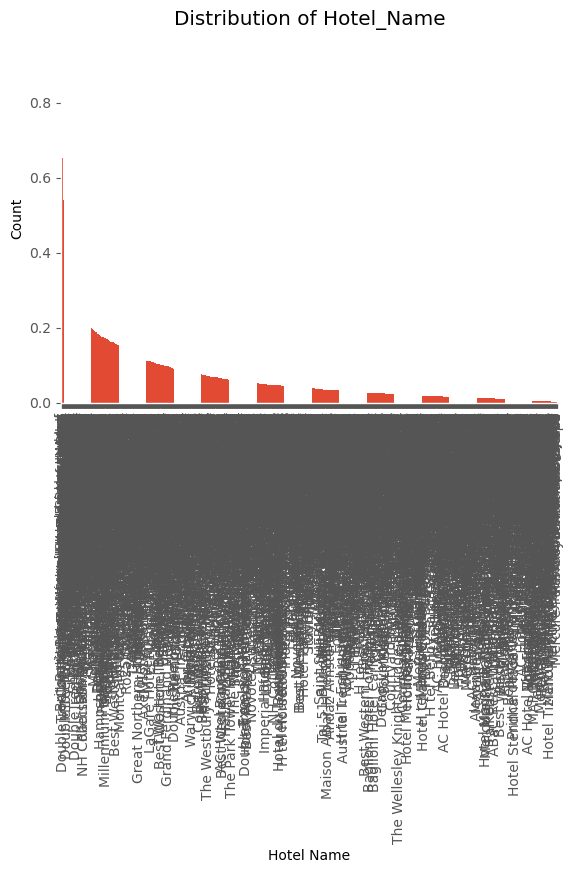

In [49]:
# plotting the distribution of Hotel_Name column

percentage1.plot(kind='bar')
plt.title('Distribution of Hotel_Name')
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.show()

From the graph above, we can see that few hotels are featured more often in the reviews while the rest slowly tail off. We can create bins to organize the hotels by popularity with "High Popularity", "Average Popularity", and "Low Popularity". Let's assign Hotel_Name's above 20% as "High Popularity", those from "8-20% as "Medium Popularity" and below 8% as "Low Popularity:

In [50]:
# grouping the hotels by popularity
low = hotels_sample['Hotel_Name'].map(percentage) <= 0.08
medium = hotels_sample['Hotel_Name'].map(percentage).between(0.08, 0.20)
high = hotels_sample['Hotel_Name'].map(percentage) >= 0.20

# replacing the the categories with desired name
hotels_sample['Hotel_Name'] = hotels_sample['Hotel_Name'].mask(low, 'Low Popularity')
hotels_sample['Hotel_Name'] = hotels_sample['Hotel_Name'].mask(medium, 'Medium Popularity')
hotels_sample['Hotel_Name'] = hotels_sample['Hotel_Name'].mask(high, 'High Popularity')

# checking results
hotels_sample['Hotel_Name'].value_counts()

Medium Popularity    18846
Low Popularity       17373
High Popularity      15354
Name: Hotel_Name, dtype: int64

Now that we have the popularity levels, we can rename the column and encode them into dummy variables:

In [51]:
# renaming the Hotel_Name column
hotels_sample.rename(columns={'Hotel_Name': 'Hotel_Popularity'}, inplace=True)

# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
hotel_popularity = pd.DataFrame(hotels_sample['Hotel_Popularity'])
encoded = ohe.fit_transform(hotel_popularity)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

# Put into a dataframe to get column names
encoded_df1 = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

# reset the indices of the two dataframes
encoded_df1 = encoded_df1.reset_index(drop=True)
hotels_sample = hotels_sample.reset_index(drop=True)

# concatenate the two dataframes horizontally
hotels_sample = pd.concat([hotels_sample, encoded_df1], axis=1)

In [52]:
#dropping Hotel Popularity category
hotels_sample = hotels_sample.drop(columns=['Hotel_Popularity'])

Let's perform a sanity check to make sure that everything worked as planned:

In [53]:
hotels_sample.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,"(London United Kingdom,)","(Milan Italy,)","(Paris France,)","(Vienna Austria,)",Review_Year,Review_Month,Review_Day,"(High Popularity,)","(Low Popularity,)","(Medium Popularity,)"
0,325,8.6,Oman,Though we had a non smoking room but the smel...,28,3221,Magnificent location and clean hotel The brea...,12,1,0,...,0,0,0,1,2017,8,1,0,0,1
1,166,8.3,Finland,No Negative,0,561,Always good wi fi works nice area good parkin...,14,88,1,...,1,0,0,0,2015,9,29,0,1,0
2,853,8.4,United Kingdom,No Negative,0,2726,we couldn t find any faults food was good sta...,19,11,1,...,1,0,0,0,2016,4,9,1,0,0
3,2623,8.7,United Kingdom,No Negative,0,12158,Fabulous customer service,4,4,1,...,1,0,0,0,2016,11,21,1,0,0
4,411,8.9,New Zealand,Size of our bedroom especially the double bed...,19,1738,Location Staff excellent customer service,6,5,0,...,1,0,0,0,2016,1,28,0,0,1


Great, now let's move on to the `Reviewer_Nationality` category.

### Converting `Reviewer Nationality` category<a class="anchor" id="connationality"></a>

As previously mentioned, most of our reviewers were from the UK. Let's minimize the number of countries by grouping those countries that have less than 2% of reviews to "Other".

In [54]:
#checking the percentage of Reviewer_Nationality
hotels["Reviewer_Nationality"].value_counts() / len(hotels["Reviewer_Nationality"])

 United Kingdom               0.475524
 United States of America     0.068711
 Australia                    0.042048
 Ireland                      0.028749
 United Arab Emirates         0.019845
                                ...   
 Cape Verde                   0.000002
 Northern Mariana Islands     0.000002
 Tuvalu                       0.000002
 Guinea                       0.000002
 Palau                        0.000002
Name: Reviewer_Nationality, Length: 227, dtype: float64

In [55]:
#setting up the percentage variable
percent_reviewers = hotels_sample['Reviewer_Nationality'].value_counts()/hotels_sample['Reviewer_Nationality'].shape*100

# grouping under 2% to other
other = hotels_sample['Reviewer_Nationality'].map(percent_reviewers) < 2.0

# converting to new category
hotels_sample['Reviewer_Nationality'] =  hotels_sample['Reviewer_Nationality'].mask(other, 'Other')

# inspecting result
hotels_sample['Reviewer_Nationality'].value_counts()

 United Kingdom               24527
Other                         18833
 United States of America      3552
 Australia                     2126
 Ireland                       1471
 United Arab Emirates          1064
Name: Reviewer_Nationality, dtype: int64

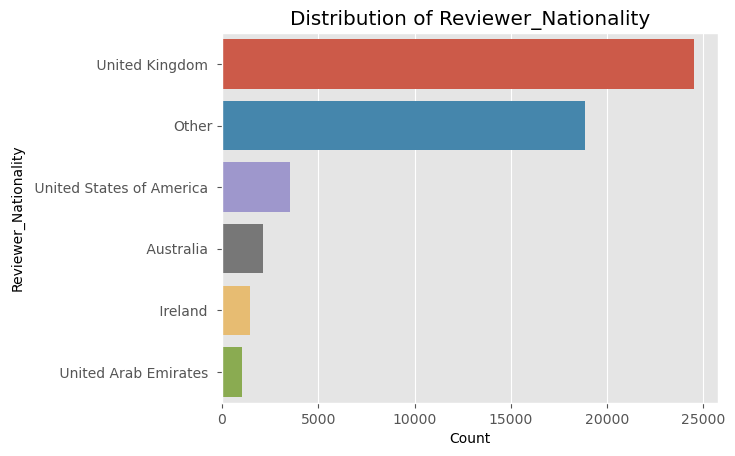

In [56]:
sns.countplot(y=hotels_sample['Reviewer_Nationality'], order=hotels_sample['Reviewer_Nationality'].value_counts().index)
plt.title('Distribution of Reviewer_Nationality')
plt.xlabel('Count')
plt.ylabel('Reviewer_Nationality')
plt.show()

Now let's OneHotEncode `Reviwer_Nationality`'s into dummy variables:

In [57]:
# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
reviewer_nationality = pd.DataFrame(hotels_sample['Reviewer_Nationality'])
encoded = ohe.fit_transform(reviewer_nationality)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array


matrix([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [58]:
#getting_categories
ohe.categories_

[array([' Australia ', ' Ireland ', ' United Arab Emirates ',
        ' United Kingdom ', ' United States of America ', 'Other'],
       dtype=object)]

In [59]:
#renaming categories
categories = ['Reviewer_nationality_Australia', 'Reviewer_nationality_Ireland', 'Reviewer_nationality_UAE',
        'Reviewer_nationality_United_Kingdom', 'Reviewer_nationality_USA', 'Reviewer_nationality_Other']

# Put into a dataframe to get column names
encoded_df2 = pd.DataFrame(dense_array, columns=categories, dtype=int)

# reset the indices of the two dataframes
encoded_df2 = encoded_df2.reset_index(drop=True)
hotels_sample = hotels_sample.reset_index(drop=True)

# concatenate the two dataframes horizontally
hotels_sample = pd.concat([hotels_sample, encoded_df2], axis=1)

In [60]:
#dropping Hotel Popularity category
hotels_sample = hotels_sample.drop(columns=['Reviewer_Nationality'])

In [61]:
hotels_sample

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,...,Review_Day,"(High Popularity,)","(Low Popularity,)","(Medium Popularity,)",Reviewer_nationality_Australia,Reviewer_nationality_Ireland,Reviewer_nationality_UAE,Reviewer_nationality_United_Kingdom,Reviewer_nationality_USA,Reviewer_nationality_Other
0,325,8.6,Though we had a non smoking room but the smel...,28,3221,Magnificent location and clean hotel The brea...,12,1,0,"[' Leisure trip ', ' Couple ', ' Comfort Room ...",...,1,0,0,1,0,0,0,0,0,1
1,166,8.3,No Negative,0,561,Always good wi fi works nice area good parkin...,14,88,1,"[' Business trip ', ' Solo traveler ', ' Singl...",...,29,0,1,0,0,0,0,0,0,1
2,853,8.4,No Negative,0,2726,we couldn t find any faults food was good sta...,19,11,1,"[' Leisure trip ', ' Couple ', ' Standard Room...",...,9,1,0,0,0,0,0,1,0,0
3,2623,8.7,No Negative,0,12158,Fabulous customer service,4,4,1,"[' Leisure trip ', ' Couple ', ' Superior Doub...",...,21,1,0,0,0,0,0,1,0,0
4,411,8.9,Size of our bedroom especially the double bed...,19,1738,Location Staff excellent customer service,6,5,0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",...,28,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51568,46,9.0,No Negative,0,499,Superb location funky decor friendly staff,8,15,1,"[' Leisure trip ', ' Couple ', ' Privilege Top...",...,3,0,1,0,0,0,0,1,0,0
51569,332,8.5,Breakfast is madly expensive and no alternati...,39,2708,Location overlooking private beach Spectacula...,41,19,1,"[' Leisure trip ', ' Family with older childre...",...,23,0,0,1,0,1,0,0,0,0
51570,390,7.8,Room 130 was very compact and had a skylight ...,61,1717,Good location on King Street close to Hammers...,57,3,0,"[' Business trip ', ' Couple ', ' Standard Dou...",...,11,0,0,1,0,0,0,1,0,0
51571,764,8.2,Bed uncomfortable big dip in middle Inch gap ...,23,2996,Location and value for money at weekend Bottl...,10,1,0,"[' Leisure trip ', ' Couple ', ' Small Queen R...",...,23,1,0,0,0,0,0,1,0,0


Great, let's move on to working with the `Tags`

### Converting `Tags` category<a class="anchor" id="contags"></a>

In [62]:
# using the .value_counts() method to find the unique values in the Reviewer_Nationality column
tag_counts = hotels['Tags'].value_counts()

# using the nunique() method to find the number of unique values in the Reviewer_Nationality column
unique = hotels['Tags'].nunique()

print(tag_counts.head(15))
print(f'There are {unique} unique values in the Reviewer_Nationality column.')

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']              5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']     4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']     4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']       3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']             3291
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']    3102
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']    2947
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']                                                  2906
[' Leisure trip ', ' Cou

There are too many tags featured in this dataset to split into dummy columns so we will refrain from doing that, instead we will be counting the number of tags in each row and representing it in a new category. The Positive_Review and Negative_Review columns also contain information that's stored in the Tags column, which is another reason that we will not need it.
From our prior analysis we see that the amount of tags is inconsistent, with some rows having 5 tags and others less. Let's create a new column to store the amount of tags in each row:


In [63]:
# counting the number of tags in each row
hotels_sample['Tags_Count'] = hotels_sample['Tags'].str.count(',') + 1

# checking the results
hotels_sample['Tags_Count'].value_counts()

5    29826
4    21139
3      542
6       59
2        7
Name: Tags_Count, dtype: int64

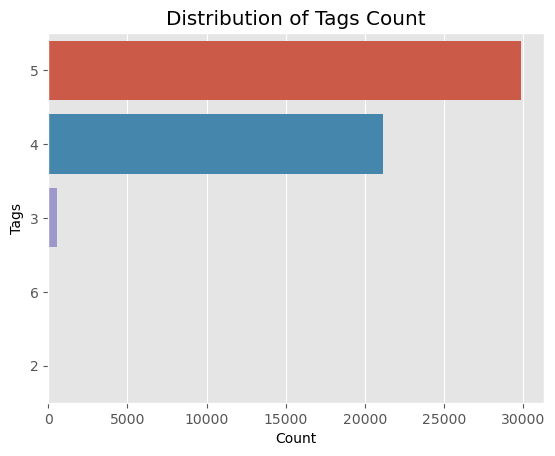

In [64]:
# visualizing distribution of tags
sns.countplot(y=hotels_sample['Tags_Count'], order=hotels_sample['Tags_Count'].value_counts().index)
plt.title('Distribution of Tags Count')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.show()

We can see that the majority of the rows have 5 or 4 tags. Now that we have our `Tags_Count` column, we can go ahead and drop the `Tags` from the dataset.

In [65]:
# dropping the Tags column
hotels_sample.drop('Tags', axis=1, inplace=True)

# checking the results
hotels_sample.columns

Index([              'Additional_Number_of_Scoring',
                                    'Average_Score',
                                  'Negative_Review',
                'Review_Total_Negative_Word_Counts',
                          'Total_Number_of_Reviews',
                                  'Positive_Review',
                'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
                                   'Reviewer_Score',
                                'days_since_review',
                                              'lat',
                                              'lng',
                         ('Amsterdam Netherlands',),
                               ('Barcelona Spain',),
                         ('London United Kingdom',),
                                   ('Milan Italy',),
                                  ('Paris France',),
                                ('Vienna Austria',),
                                      'Review_

In [66]:
hotels_sample.columns

Index([              'Additional_Number_of_Scoring',
                                    'Average_Score',
                                  'Negative_Review',
                'Review_Total_Negative_Word_Counts',
                          'Total_Number_of_Reviews',
                                  'Positive_Review',
                'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
                                   'Reviewer_Score',
                                'days_since_review',
                                              'lat',
                                              'lng',
                         ('Amsterdam Netherlands',),
                               ('Barcelona Spain',),
                         ('London United Kingdom',),
                                   ('Milan Italy',),
                                  ('Paris France',),
                                ('Vienna Austria',),
                                      'Review_

### Converting `days_since_review`  category to numeric<a class="anchor" id="condays"></a>

As previously noted, the `days_since_review` category contains the amount of time that passed since the person last left a review. Let's remove the text that follows the number and convert it into a numeric column:

In [67]:
# removing the days text from the days_since_review column
hotels_sample['days_since_review'] = hotels_sample['days_since_review'].str.replace('days', '').str.replace('day', '')

# checking the results
hotels_sample['days_since_review'].value_counts()

322     261
120     253
1       238
338     194
394     186
       ... 
475      16
615      15
121      15
124      10
123       5
Name: days_since_review, Length: 731, dtype: int64

Now let's convert it to a numeric column:

In [68]:
# converting the days_since_review column to numeric
hotels_sample['days_since_review'] = pd.to_numeric(hotels_sample['days_since_review'])

# checking the results
hotels_sample['days_since_review'].dtype

dtype('int64')

In [69]:
hotels_sample.select_dtypes("object").columns

Index(['Negative_Review', 'Positive_Review'], dtype='object')

We've converted all of our categories into `numeric` and our last remaining `object` categories are `Negative_Review` and `Positive_Review` which we will tackle next.

### Splitting the data into Train and Test sets<a class="anchor" id="splitting"></a>

Next let's split our data into Train and Test sets. We will use a test size of 20% and set a random state to ensure reproducibility. We'll also stratify our split to our target variable `Reviewer_Score` to ensure that our training and testing sets have the same proportion of classes. Even though our target variable has been binarized and has a proportion of 57% - 43%, it doesn't hurt to stratify our data.

In [70]:
# splitting the data into train/test sets based on target category
X = hotels_sample.drop('Reviewer_Score', axis=1)
y = hotels_sample['Reviewer_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, stratify=y)

# checking shape
print(f'The shape of the X_train set is {X_train.shape}')
print(f'The shape of the X_test set is {X_test.shape}')
print(f'The shape of the y_train set is {y_train.shape}')
print(f'The shape of the y_test set is {y_test.shape}')

The shape of the X_train set is (41258, 30)
The shape of the X_test set is (10315, 30)
The shape of the y_train set is (41258,)
The shape of the y_test set is (10315,)


We chose to do the train/test split before beginning the count vectorizing process for two reasons. By splitting the data into train and test sets, we can train our model on the training set and evaluate its performance on the test set. This is important because we want to know how well our model will perform on new and unseen data. If we didn't split the data and evaluated our model on the same data that we used for training, we would not have a good idea of how well our model would perform with new data.

Another reason we split the data is to avoid overfitting. Overfitting occurs when a model becomes too complex and starts to fit noise in the training data instead of the underlying patterns. By evaluating our model on a separate test set, we can get an idea of whether our model is overfitting to the training data. If our model performs well on the training set but poorly on the test set, it is likely that it is overfitting to the training data. Splitting the data into train and test sets allows us to identify and address this problem before deploying the model in the real world. Now we can begin the Vectorizing process.

### Vectorizing `Positive_Review` and `Negative_Review` columns<a class="anchor" id="vectorizing"></a>

In [71]:
# using a count vectorizer to combine the Positive_Review and Negative_Review columns
from sklearn.feature_extraction.text import CountVectorizer

# instantiating CountVectorizer
bagofwords = CountVectorizer(min_df=0.05, stop_words='english')

# fitting CountVectorizer to the Positive_Review column
bagofwords.fit(X_train['Positive_Review'])

# transforming train portion of Positive_Review column
X_train_positive = bagofwords.transform(X_train['Positive_Review'])

# transforming test portion of Positive_Review column
X_test_positive = bagofwords.transform(X_test['Positive_Review'])

In [72]:
#extracting features
bagofwords.get_feature_names_out()

array(['bed', 'breakfast', 'clean', 'close', 'comfortable', 'excellent',
       'friendly', 'good', 'great', 'helpful', 'hotel', 'location',
       'lovely', 'nice', 'positive', 'room', 'rooms', 'staff', 'station',
       'stay'], dtype=object)

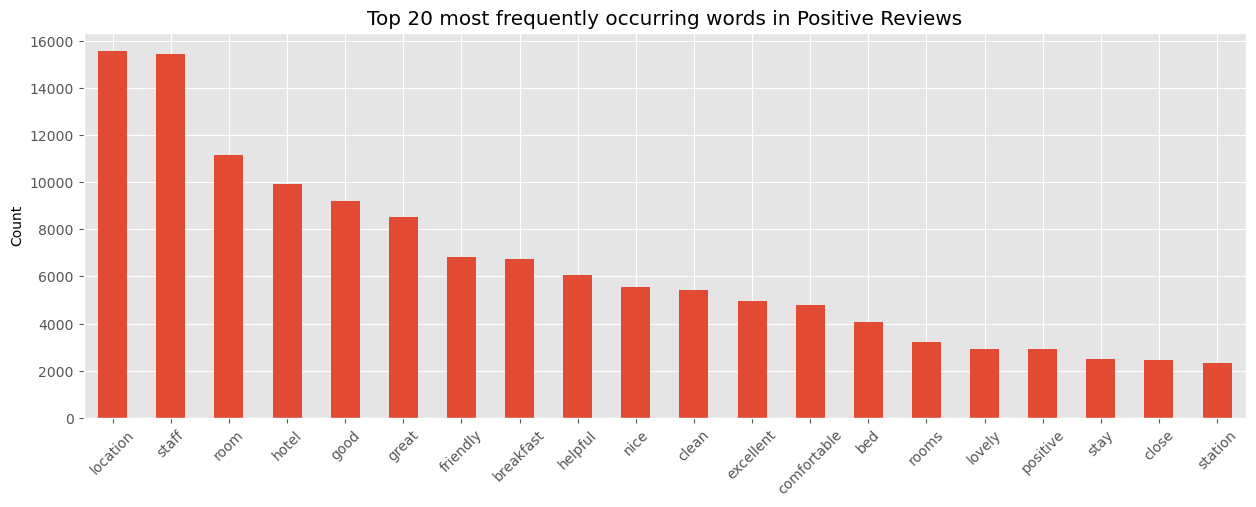

In [73]:
#plotting words obtained from positive reviews
word_counts = pd.DataFrame(
    {"counts": X_train_positive.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in Positive Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [74]:
# instantiating CountVectorizer
#stop_words = english removes common words such as "and", "or", "the" which are not relevant to our search
bagofwords = CountVectorizer(min_df=0.05, stop_words='english')

# fitting the CountVectorizer to the Negative_Review column
bagofwords.fit(X_train['Negative_Review'])

# transforming train portion of Negative_Review column
X_train_negative = bagofwords.transform(X_train['Negative_Review'])

# transforming test portion Negative_Review column
X_test_negative = bagofwords.transform(X_test['Negative_Review'])

In [75]:
#extracting features
bagofwords.get_feature_names_out()

array(['breakfast', 'hotel', 'negative', 'room', 'rooms', 'small',
       'staff'], dtype=object)

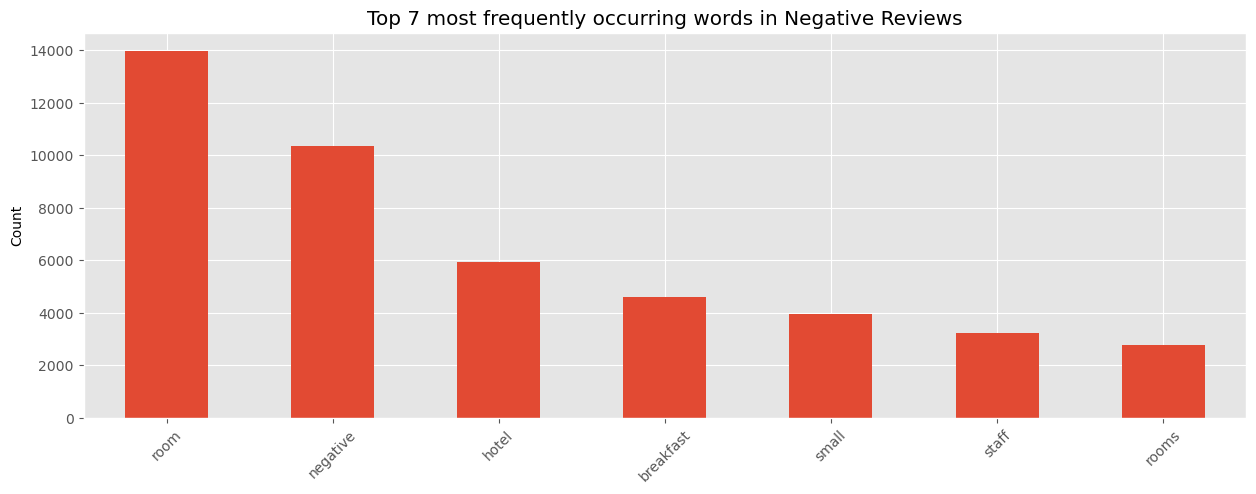

In [76]:
#plotting words obtained from negaative reviews
word_counts = pd.DataFrame(
    {"counts": X_train_negative.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)
word_counts.head(7).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 7 most frequently occurring words in Negative Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

From graphs above, we can see some common words used in negative and positive reviews. The positive reviews vectorizer produced 20 results while the negative one produced only 7. In the positive reviews, we can see words such as "clean", "comfortable", "excellent", and "lovely" which summarize a positive hotel experience. On the other hand, in the negative review columns we see words like "small", "staff", and "negative". Though less descriptive, they may signify small rooms and rude staff. The word "negative" may be over represented because some reviews had "No Negative" when a negative review wasn't present. Let's run our vectorizers again to see if we can extract more words from the review columns. This time, we will adjust the `min_df` parameter to capture more words. It was initially set to 0.05 and this time we will set it to 0.025 for `Positive Reviews` and 0.01 for `Negative_Reviews`.

We will also set an `ngram_range` = (1, 2) to obtain two word sequences which may provide us with more context from the reviews.

In [77]:
# using a count vectorizer to combine the Positive_Review and Negative_Review columns
from sklearn.feature_extraction.text import CountVectorizer

# instantiating CountVectorizer
bagofwords = CountVectorizer(min_df=0.025, ngram_range=(1, 2), stop_words='english')

# fitting CountVectorizer to the Positive_Review column
bagofwords.fit(X_train['Positive_Review'])

# transforming train portion of Positive_Review column
X_train_positive = bagofwords.transform(X_train['Positive_Review'])

# transforming test portion of Positive_Review column
X_test_positive = bagofwords.transform(X_test['Positive_Review'])

In [78]:
#extracting features
bagofwords.get_feature_names_out()

array(['amazing', 'area', 'bar', 'bathroom', 'beautiful', 'bed', 'beds',
       'breakfast', 'central', 'city', 'clean', 'close', 'comfortable',
       'comfy', 'easy', 'excellent', 'facilities', 'fantastic', 'food',
       'free', 'friendly', 'friendly helpful', 'friendly staff', 'good',
       'good location', 'great', 'great location', 'helpful',
       'helpful staff', 'hotel', 'just', 'location', 'london', 'lovely',
       'metro', 'modern', 'nice', 'perfect', 'positive', 'quiet',
       'really', 'reception', 'room', 'rooms', 'service', 'spacious',
       'staff', 'staff friendly', 'staff helpful', 'station', 'stay',
       'view', 'walk'], dtype=object)

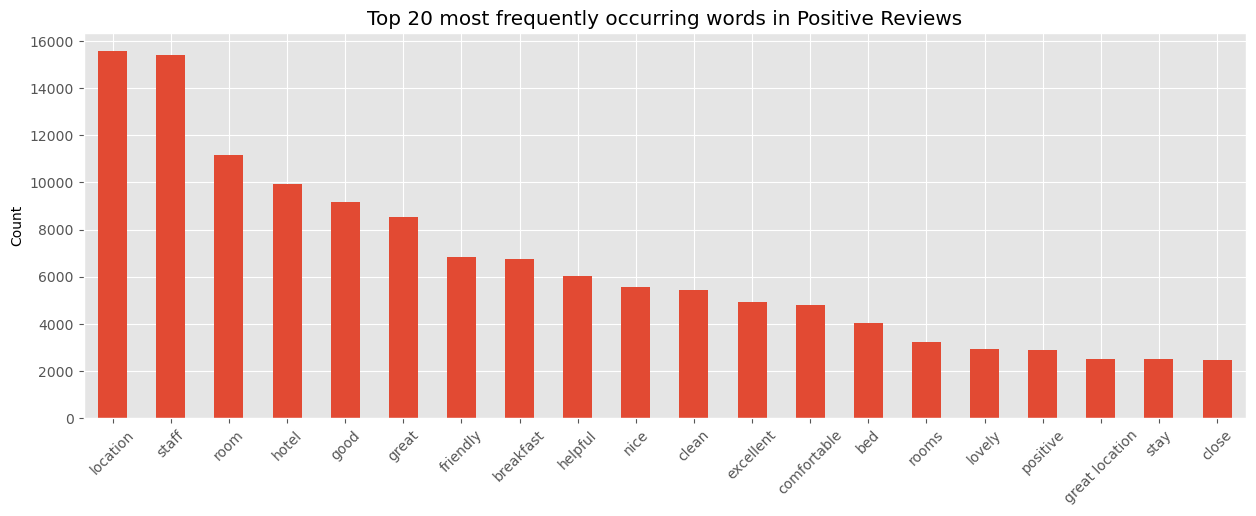

In [79]:
# plotting words obtained from positive reviews
word_counts = pd.DataFrame(
    {"counts": X_train_positive.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in Positive Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [80]:
# instantiating CountVectorizer
bagofwords = CountVectorizer(min_df=0.01, ngram_range=(1, 2), stop_words='english')

# fitting the CountVectorizer to the Negative_Review column
bagofwords.fit(X_train['Negative_Review'])

# transforming train portion of Negative_Review column
X_train_negative = bagofwords.transform(X_train['Negative_Review'])

# transforming test portion Negative_Review column
X_test_negative = bagofwords.transform(X_test['Negative_Review'])

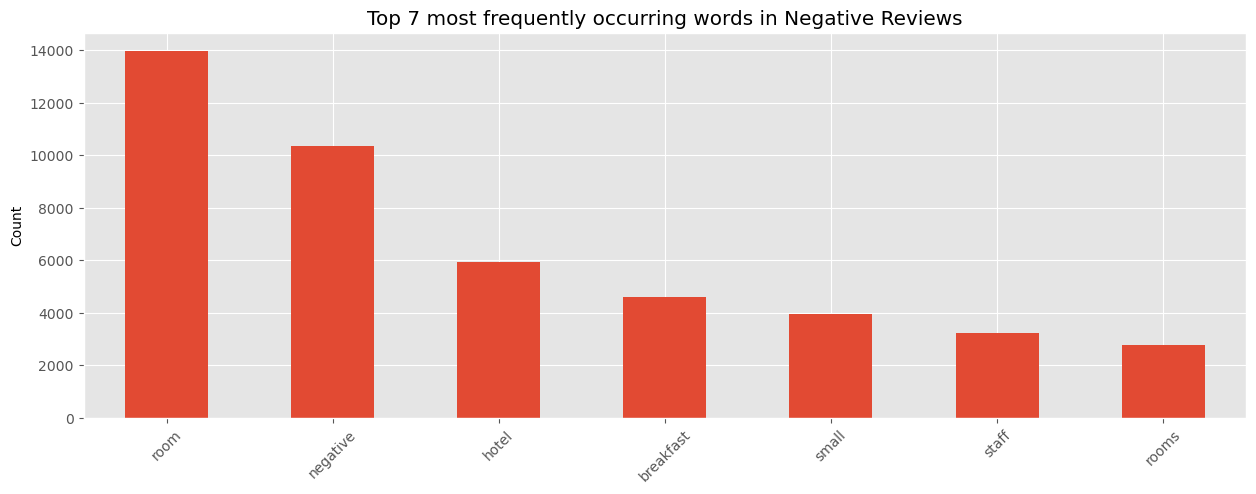

In [81]:
# plotting words obtained from negative reviews

word_counts = pd.DataFrame(
    {"counts": X_train_negative.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)
word_counts.head(7).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 7 most frequently occurring words in Negative Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Reducing the min_df affected the `Positive_Reviews` column more than the `Negative_Reviews`, as it produced more results with new words like "quiet", "positive" and "perfect. The `Negative_Reviews` column still had only 7 results even when adjusting `min_df` and adding `ngram_range`. In the `Positive_Reviews`, common ngrams were "staff friendly" and "great location" which provided us with more context about the reviews.

`min_df`, also known as minimum document frequency, specifies the number of documents a word must appear in to be considered for further analysis. It represents the fraction of total number of documents that the word must appear in order to be included. The `min_df` parameter gave us more control over our vectorizer by excluding any tokens that occurred less than the `min_df` value. Previously, it was set to 5% of documents and when we reduced it to 2.5%, we got more words out of our category because we changed the limit threshold from 5 to 2.5%. However, when we changed the `min_df` to 1% in the `Negative_Reviews` column, we still ended up with the same 7 words. This probably means that there weren't many unique words in the `Negative_Reviews` category and the words that appear in fewer documents were already returned in the corpus. The significant left skew of the dataset may have contributed to less frequency of negative tokens, as there were fewer negative reviews. 

Now we can combine the three matrixes into one and complete the data wrangling process.

### Combining the three Matrixes<a class="anchor" id="matrixes"></a>

In [82]:
# importing hstack
from scipy.sparse import hstack

# combining sparse matrix with numerical data in train set
X_train = hstack([X_train_positive, X_train_negative, X_train.drop(['Positive_Review', 'Negative_Review'], axis=1)])

# combining sparse matrix with numerical data in test set
X_test = hstack([X_test_positive, X_test_negative, X_test.drop(['Positive_Review', 'Negative_Review'], axis=1)])

In [83]:
# checking the shape of the train and test sets
print(f'The shape of the X_train set is {X_train.shape}')
print(f'The shape of the X_test set is {X_test.shape}')
print(f'The shape of the y_train set is {y_train.shape}')
print(f'The shape of the y_test set is {y_test.shape}')

The shape of the X_train set is (41258, 213)
The shape of the X_test set is (10315, 213)
The shape of the y_train set is (41258,)
The shape of the y_test set is (10315,)


## Conclusion<a class="anchor" id="conclusion"></a>

In this project, we've analysed the distribution of our target variable, converted non-numeric categories into numerical, organized variables into bins, extracted dates, and vectorized positive and negative reviews, combining them with numerical data. Our data is clean, wrangled, and ready for modelling.